<a href="https://colab.research.google.com/github/NityaVattam2002/Nitya_INFO5731_Fall2024/blob/main/Vattam_Nitya_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here
# Installing impotant libraries
!pip install -q bertopic
!pip install -q transformers
!pip install -q nltk

# Importing those required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords
import re

# Downloading stopwords
nltk.download('stopwords')

# Loading the dataset which is on my laptop. I got it from previous assignment
from google.colab import files
uploaded = files.upload()

# Loading the dataset
df = pd.read_csv(next(iter(uploaded.keys())))
df.head()

# Preprocessing the text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Removing special characters
    text = text.lower()  # Converting to lowercase
    text = re.sub(r'\s+', ' ', text)  # Removing extra spaces
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Applying text preprocessing
df['clean_text'] = df['clean_text'].apply(preprocess_text)

# LDA topic modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_vectorized = vectorizer.fit_transform(df['clean_text'])

lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(text_vectorized)

# Displaying the top 10 topics from LDA
print("LDA Topic Descriptions:")
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = " ".join([words[i] for i in topic.argsort()[:-11:-1]])
    print(f"Topic #{topic_idx + 1}: {top_words}")

# BERTopic modeling
bertopic_model = BERTopic()
topics, probs = bertopic_model.fit_transform(df['clean_text'])

# Displaying the top 10 topics from BERTopic
print("\nBERTopic Top 10 Clusters Summary:")
bertopic_summary = bertopic_model.get_topic_info().head(10)
print(bertopic_summary)

# I have created this function to describe the topics from LDA
def describe_lda_topics(lda_model, vectorizer):
    words = vectorizer.get_feature_names_out()
    topics_description = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = " ".join([words[i] for i in topic.argsort()[:-11:-1]])
        topics_description.append(f"Topic #{topic_idx + 1}: {top_words}")
    return topics_description

# Generating and printing topic descriptions
lda_topics_description = describe_lda_topics(lda_model, vectorizer)
print("\nDetailed LDA Topic Descriptions:")
for description in lda_topics_description:
    print(description)





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving annotated_reviews.csv to annotated_reviews.csv
LDA Topic Descriptions:
Topic #1: says oil state study really trump think bad timeline denial
Topic #2: amid new dont scientists law civilizations alien isnt says really
Topic #3: says women children jd vance deranged denial timeline new killing
Topic #4: oil fight really trump think bad says timeline denial study
Topic #5: trump fight efficient switching power france nuclear fastest way really
Topic #6: desantis dismisses calling weather politicisation really trump think bad says
Topic #7: study killing civilizations alien suggests really trump think bad says
Topic #8: people scientists research happening deny suggests study trump think really
Topic #9: real law bad think isnt state really desantis trump says
Topic #10: deniers biden dont really trump think bad says denial timeline


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


BERTopic Top 10 Clusters Summary:
   Topic  Count                           Name  \
0     -1     50  -1_climate_change_people_says   

                                      Representation  \
0  [climate, change, people, says, real, desantis...   

                                 Representative_Docs  
0  [friendly reminder climate change deniers dont...  

Detailed LDA Topic Descriptions:
Topic #1: says oil state study really trump think bad timeline denial
Topic #2: amid new dont scientists law civilizations alien isnt says really
Topic #3: says women children jd vance deranged denial timeline new killing
Topic #4: oil fight really trump think bad says timeline denial study
Topic #5: trump fight efficient switching power france nuclear fastest way really
Topic #6: desantis dismisses calling weather politicisation really trump think bad says
Topic #7: study killing civilizations alien suggests really trump think bad says
Topic #8: people scientists research happening deny suggests stu

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [2]:
# Write your code here
# Importing needed libraries
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Loading the dataset from assignment 3
from google.colab import files
uploaded = files.upload()

# Loading and showing some section of the data
df = pd.read_csv(next(iter(uploaded.keys())))
df.head()

#  function to preprocess the text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Removing special characters
    text = text.lower()  # Converting to lowercase
    text = re.sub(r'\s+', ' ', text)  # Removing extra spaces
    return text

# Applying text preprocessing
df['clean_text'] = df['clean_text'].apply(preprocess_text)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['clean_text']).toarray()
y = df['sentiment']

# Splitting the data into training and testing sets (80-20 split as adviced above)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing two classifiers: Naive Bayes and Logistic Regression
model1 = MultinomialNB()
model2 = LogisticRegression(max_iter=1000)

# Performing 5-fold cross-validation and train models
cv_scores_model1 = cross_val_score(model1, X_train, y_train, cv=5)
cv_scores_model2 = cross_val_score(model2, X_train, y_train, cv=5)

print(f"Naive Bayes Cross-Validation Accuracy: {cv_scores_model1.mean():.2f}")
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores_model2.mean():.2f}")

# Training the models on the training set
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Making predictions on the test set
y_pred_model1 = model1.predict(X_test)
y_pred_model2 = model2.predict(X_test)

# Evaluating model performance using accuracy, precision, recall, and F1 score
print("\nPerformance Metrics for Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_model1):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_model1, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_model1, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_model1, average='weighted'):.2f}")

print("\nPerformance Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_model2):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_model2, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_model2, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_model2, average='weighted'):.2f}")






Saving annotated_reviews.csv to annotated_reviews (1).csv
Naive Bayes Cross-Validation Accuracy: 0.60
Logistic Regression Cross-Validation Accuracy: 0.57

Performance Metrics for Naive Bayes:
Accuracy: 0.50
Precision: 0.25
Recall: 0.50
F1 Score: 0.33

Performance Metrics for Logistic Regression:
Accuracy: 0.50
Precision: 0.25
Recall: 0.50
F1 Score: 0.33


For this task, I chose TF-IDF (Term Frequency-Inverse Document Frequency) as my primary feature representation because it works nicely on the significance of words within the text. TF-IDF works by emphasizing words that are important for understanding sentiment while reducing the weight of common and less meaningful terms, like “the” or “and.” This method makes that sentiment-carrying words, such as “hoax” for negative or “hope” for positive sentiments, are more impactful in the model's learning process. Additionally, TF-IDF is computationally efficient and well-suited for our chosen machine learning models, Naive Bayes and Logistic Regression. Both models benefit from the clear and informative text vectors provided by TF-IDF, enabling accurate and interpretable sentiment classification.

When comparing Naive Bayes and Logistic Regression for the analysis, there are some differences in how they did their job. Naive Bayes had a higher cross-validation accuracy of 0.60 compared to Logistic Regression, which had 0.57. All the same, when we look at the actual performance on the test data, both models ended up with the same accuracy of 0.50. They also had same precision, recall, and F1 scores, all showing the models did not perform well, with precision at 0.25, recall at 0.50, and an F1 score of 0.33. This tells that even though Naive Bayes seemed better during cross-validation, neither model was strong when tested on new data. We might need to try other methods or improve the features to get better results.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Saving test.csv to test.csv
Saving train.csv to train.csv
First 5 rows of the training data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN       

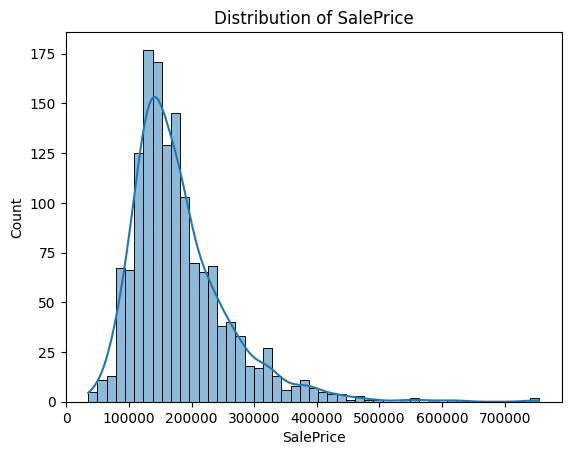

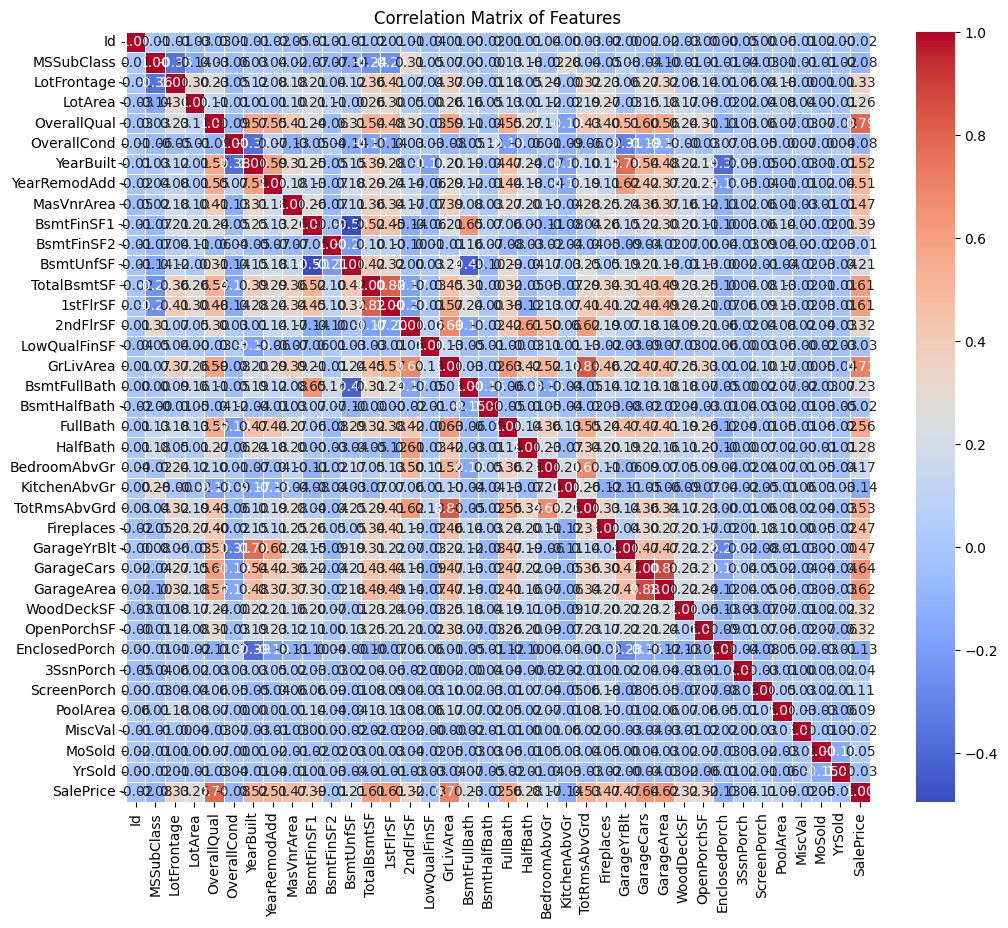


Mean Squared Error (MSE): 2642483715.1944375
Root Mean Squared Error (RMSE): 51405.09425333678
R-squared (R²): 0.655492655225221


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1: Uploading the data files
uploaded = files.upload()

# Loading the two datassets into pandas dataframes
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 2: Performing Exploratory Data Analysis (EDA)
print("First 5 rows of the training data:")
print(train_df.head())

# Checking for missing values
print("\nMissing values per column:")
print(train_df.isnull().sum())

#  2.1: Handling missing values
# Imputing numerical columns with median and categorical columns with mode
for column in train_df.columns:
    if train_df[column].dtype == 'object':  # Categorical column
        train_df[column] = train_df[column].fillna(train_df[column].mode()[0])  # This is for mode imputation for categorical
    else:  # Numerical column
        train_df[column] = train_df[column].fillna(train_df[column].median())  # And this is median imputation for numerical

# Checking if there are still any missing values
print("\nMissing values per column after imputation:")
print(train_df.isnull().sum())

# Summary statistics of numerical features
print("\nSummary statistics of numerical features:")
print(train_df.describe())

# Visualizing the distribution of house prices
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# 2.2: Plot correlation matrix for features to note relationships with SalePrice
# Selecting only numeric columns for correlation calculation
numeric_columns = train_df.select_dtypes(include=['number']).columns
numeric_df = train_df[numeric_columns]

# Calculating the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Ploting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# 3: Splitting the data into features (X) and target (y)
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# 4: Doing categorical data encoding
# Identifying categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Using OneHotEncoder to convert categorical variables into numeric. That is dummy variables
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)  # handle_unknown='ignore'
    ], remainder='passthrough'
)

# 5: Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6: Building the regression model using pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

# Training the model
pipeline.fit(X_train, y_train)

# 7: Model evaluation
# Making predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculating evaluation metrics: MSE, RMSE, and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation results
print(f'\nMean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


I selected the features based on how they related to predicting house prices. Numerical features like the number of bedrooms, square footage, and age of the house are likely to have a direct impact on the price. Categorical features such as the neighborhood or type of material used for the house can also influence the price by reflecting factors like location and quality. These features help build a clearer picture of what contributes to the value of a home, making them important for creating an accurate model.

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [4]:
# Importing needed libraries
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

#  Loading the uploaded dataset. I uploaded earlier therefore it is already around
df = pd.read_csv('annotated_reviews.csv')

# Checking if the necessary columns are present in the dataset
print(df.head())  # Displaying first few rows to verify column names

#  Initializing the pre-trained BERT model for sentiment analysis
model = pipeline('sentiment-analysis', model='bert-base-uncased')

# : Performing sentiment analysis on the dataset
predictions = []
for review in df['clean_text']:  # Using 'clean_text' column for reviews
    pred = model(review)[0]  # Getting the prediction for each review
    predictions.append(pred['label'])  # Storing the predicted sentiment label

#  Mapping the predicted labels to numeric values

label_mapping = {'LABEL_0': 'negative', 'LABEL_1': 'positive', 'LABEL_2': 'neutral'}
numeric_predictions = [label_mapping.get(pred, pred) for pred in predictions]

#  Extracting the ground truth labels from the sentiment column
ground_truth = df['sentiment']  # Ground truth sentiments (negative, neutral, positive)

#  Evaluating the model performance using Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(ground_truth, numeric_predictions)
precision = precision_score(ground_truth, numeric_predictions, average='weighted', labels=['negative', 'neutral', 'positive'])
recall = recall_score(ground_truth, numeric_predictions, average='weighted', labels=['negative', 'neutral', 'positive'])
f1 = f1_score(ground_truth, numeric_predictions, average='weighted', labels=['negative', 'neutral', 'positive'])

# Printing the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


   document_id                                         clean_text sentiment
0            1                           climate change is a hoax  negative
1            2                         climate change  a timeline   neutral
2            3  my favorite climate change fact that will blow...  negative
3            4  realistically how screwed are we by climate ch...  negative
4            5                is climate change going well or bad   neutral


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Accuracy: 0.24
Precision: 0.0576
Recall: 0.24
F1 Score: 0.0929032258064516


I chose BERT. It was pre-trained on large text corpora, including the BooksCorpus  and English Wikipedia . It is set to understand word context by considering both the left and right context of a word in a sentence. This is an important feature that sets it apart from models that process text in one direction. The base version of BERT has 110 million parameters, making it powerful for natural language understanding tasks. While BERT isnot specifically fine-tuned for sentiment analysis just like that, its pre-training on general tasks like ML modeling and NSP enables it to understand language nuances. For this task, I used BERT in a zero-shot setting, meaning it directly performs sentiment analysis without additional fine-tuning, leveraging its general language understanding to predict sentiment.

Advantages of BERT:
BERT is good at understanding context from both directions in a sentence, making it highly effective for tasks like sentiment analysis. Pre-trained on large datasets like Wikipedia, it is all round and needs little fine-tuning. It also has strong community support and easy integration with tools like Hugging Face.

Disadvantages of BERT:
BERT is in a way expensive bcause of its large size, needing large memory and processing power. Additionally, its zero-shot predictions may not be as accurate as fine-tuned models, especially for domain-specific tasks.

Challenges:
The main challenge was managing BERT’s high resource demands, especially in a cloud environment. Although it did well for sentiment analysis, there were some difficulties in distinguishing between neutral and mixed sentiments, and further fine-tuning could improve accuracy.